In [1]:
from datasets import load_dataset


train_dataset = load_dataset("csv", data_files="..\datasets\soham-articles\\bn\\bn-train.csv", column_names=["labels","text"], split="train")

Using custom data configuration default-02f2b2f3fa2d27bd
Found cached dataset csv (C:/Users/arifa/.cache/huggingface/datasets/csv/default-02f2b2f3fa2d27bd/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317)


In [2]:
valid_dataset = load_dataset("csv", data_files="..\datasets\soham-articles\\bn\\bn-valid.csv", column_names=["labels","text"], split="train")

Using custom data configuration default-ea82245f012595c5
Found cached dataset csv (C:/Users/arifa/.cache/huggingface/datasets/csv/default-ea82245f012595c5/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317)


In [3]:
test_dataset = load_dataset("csv", data_files="..\datasets\soham-articles\\bn\\bn-test.csv", column_names=["labels","text"], split="train")

Using custom data configuration default-4e1c4cf71b1df758
Found cached dataset csv (C:/Users/arifa/.cache/huggingface/datasets/csv/default-4e1c4cf71b1df758/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317)


In [4]:
from datasets import Dataset, DatasetDict

news_datasets = DatasetDict()
news_datasets['train'] = train_dataset
news_datasets['test'] = test_dataset
news_datasets['validation'] = valid_dataset

In [5]:
news_datasets

DatasetDict({
    train: Dataset({
        features: ['labels', 'text'],
        num_rows: 11284
    })
    test: Dataset({
        features: ['labels', 'text'],
        num_rows: 1411
    })
    validation: Dataset({
        features: ['labels', 'text'],
        num_rows: 1411
    })
})

In [6]:
train_dataset.set_format("pandas")

In [7]:
# get label counts for both classes
label_counts = train_dataset["labels"].value_counts()
num_labels = (len(label_counts.keys()))

In [8]:
label_counts

kolkata          4603
state            2245
national         1435
sports           1289
entertainment    1186
international     526
Name: labels, dtype: int64

In [9]:
max_token_length = max(train_dataset['text'].str.len())
max_token_length

13776

In [10]:
train_dataset.reset_format()

In [11]:
from transformers import set_seed

# set_seed(30)
set_seed(42)

In [12]:
from transformers import PreTrainedTokenizerFast, AutoModelForSequenceClassification

tokenizer = PreTrainedTokenizerFast.from_pretrained("../Bengali Pretraining/models/unigram/unigram-long-text")

In [13]:
model =  AutoModelForSequenceClassification.from_pretrained("../Bengali Pretraining/models/unigram/unigram-long-text", num_labels=num_labels)

Some weights of the model checkpoint at ../Bengali Pretraining/models/unigram/unigram-long-text were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model che

In [14]:
# num_added_tokens = tokenizer.add_tokens(["5","7","8","9"])

In [15]:
# Notice: resize_token_embeddings expect to receive the full size of the new vocabulary, i.e., the length of the tokenizer.
# model.resize_token_embeddings(len(tokenizer))

In [16]:
def tokenize_function(example):
    #return tokenizer(example["text"], truncation=True)
    return tokenizer(example["text"], truncation=True, max_length=128)

In [17]:
from transformers import DataCollatorWithPadding

tokenized_datasets = news_datasets.map(tokenize_function, batched=True, remove_columns=["text"])
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

Loading cached processed dataset at C:\Users\arifa\.cache\huggingface\datasets\csv\default-02f2b2f3fa2d27bd\0.0.0\6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317\cache-357427203edda30b.arrow


  0%|          | 0/2 [00:00<?, ?ba/s]

Loading cached processed dataset at C:\Users\arifa\.cache\huggingface\datasets\csv\default-ea82245f012595c5\0.0.0\6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317\cache-957759c09a108628.arrow


In [18]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 11284
    })
    test: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1411
    })
    validation: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1411
    })
})

In [19]:
temp = tokenized_datasets.filter(lambda x:x if 0 in x["input_ids"] else None)

Loading cached processed dataset at C:\Users\arifa\.cache\huggingface\datasets\csv\default-02f2b2f3fa2d27bd\0.0.0\6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317\cache-781996ba2acef5a2.arrow


  0%|          | 0/2 [00:00<?, ?ba/s]

Loading cached processed dataset at C:\Users\arifa\.cache\huggingface\datasets\csv\default-ea82245f012595c5\0.0.0\6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317\cache-d7076d0e07ccde6c.arrow


In [20]:
temp

DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 11219
    })
    test: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1403
    })
    validation: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1403
    })
})

In [21]:
# for sample in temp["train"]:
#     print(tokenizer.decode(sample["input_ids"]))

In [23]:
def assign_label(example):
    mapping = {
        "kolkata":0,
        "state":1,
        "national":2,
        "sports":3,
        "entertainment":4,
        "international":5
    }
    example['labels'] = mapping[example['labels']]
    return example

In [24]:
tokenized_datasets = tokenized_datasets.map(assign_label)
tokenized_datasets.set_format("torch")
tokenized_datasets.column_names

Loading cached processed dataset at C:\Users\arifa\.cache\huggingface\datasets\csv\default-02f2b2f3fa2d27bd\0.0.0\6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317\cache-41ccc3844cad2d53.arrow


  0%|          | 0/1411 [00:00<?, ?ex/s]

Loading cached processed dataset at C:\Users\arifa\.cache\huggingface\datasets\csv\default-ea82245f012595c5\0.0.0\6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317\cache-bbc23b1191b96986.arrow


{'train': ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
 'test': ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
 'validation': ['labels', 'input_ids', 'token_type_ids', 'attention_mask']}

In [25]:
samples = [tokenized_datasets["train"][i] for i in range(5)]
samples

for chunk in data_collator(samples)["input_ids"]:
    print(f"\n'>>> {tokenizer.decode(chunk)}'")

You're using a PreTrainedTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.



'>>> [CLS] প্রজাপতি প্রজাপতি আমার ইচ্ছে হয়ে[UNK] বনে বনে ঘাসে ঘাসে ওড়ে আর ফেরে...[UNK]সেই সুর যা ফিরিয়ে দেয় শৈশবের সুগন্ধ। সবিতা চৌধুরী। যাঁর কণ্ঠ অপূর্ব সব গানগুচ্ছ উপহার দিয়েছে সব প্রজন্মের গানপ্রেমীদের। দুরারোগ্য কর্কটরোগে আক্রান্ত সেদিনের সবিতা। গত কয়েক বছর ধরে নিরন্তর লড়াইয়ের পর এখন প্রহর গুনছেন । যেকোনও দিনই আসতে পারে সেই ভয়ঙ্কর দিনটি।[UNK]এখন তাঁর বড় মেয়ে অন্তরা চৌধুরীর কাছেই আছেন তিনি। রুবি হাসপাতালের খুব কাছেই বড় মেয়ের কাছেই কাটাতে চান জীবনের শেষ কয়েকটি দিন। আজই এবেলা.ইন কে জানালেন অন্তরা।[UNK]স্বামী সলিল চৌধুরীর অনুরোধেই প্রথম অ্যালবামে গাওয়া গান[SEP]'

'>>> [CLS] দীর্ঘ সাত মাসের প্রতীক্ষার পর সোমবার সকালে এসে পৌঁছল কলকাতা মেট্রো রেলের নতুন এসি রেক। গত ডিসেম্বরে ওই রেকটি এসে পৌঁছনোর কথা থাকলেও একাধিক কারণে রেক পেতে অনেকটা দেরি হল বলে মেট্রো সূত্রের খবর। [UNK]চেন্নাইয়ের ইন্টিগ্রাল কোচ ফ্যাক্টরিকে [UNK]আইসিএফ[UNK] দু[UNK]টি এসি রেকের বরাত দেওয়া হয়েছিল। তার মধ্যে প্রথম রেকটি এদিন এসে পৌঁছেছে। দ্বিতীয় রেকটি পৌঁছনোর কথা অগস্টের তৃতীয় সপ্তাহে। এখনকার এসি রেকগুল

In [26]:
news_datasets["train"][:5]

{'labels': ['entertainment', 'state', 'state', 'sports', 'national'],
 'text': ['প্রজাপতি প্রজাপতি আমার ইচ্ছে হয়ে, বনে বনে ঘাসে ঘাসে ওড়ে আর ফেরে...\nসেই সুর যা ফিরিয়ে দেয় শৈশবের সুগন্ধ। সবিতা চৌধুরী। যাঁর কণ্ঠ অপূর্ব সব গানগুচ্ছ উপহার দিয়েছে সব প্রজন্মের গানপ্রেমীদের। দুরারোগ্য কর্কটরোগে আক্রান্ত সেদিনের সবিতা। গত কয়েক বছর ধরে নিরন্তর লড়াইয়ের পর এখন প্রহর গুনছেন । যেকোনও দিনই আসতে পারে সেই ভয়ঙ্কর দিনটি।\nএখন তাঁর বড় মেয়ে অন্তরা চৌধুরীর কাছেই আছেন তিনি। রুবি হাসপাতালের খুব কাছেই বড় মেয়ের কাছেই কাটাতে চান জীবনের শেষ কয়েকটি দিন। আজই এবেলা.ইন কে জানালেন অন্তরা।\nস্বামী সলিল চৌধুরীর অনুরোধেই প্রথম অ্যালবামে গাওয়া গান মরি হায় গো হায়। সবিতার কণ্ঠস্বরের জাদুতে সেই গান শাশ্বত হয়ে আছে।\xa0\nএখন এই আনন্দের শহরে একলা শুয়ে সবিতা। সুরের সেই ঝর-ঝর-ঝরণা যে আজ নিরুচ্চার',
  'দীর্ঘ সাত মাসের প্রতীক্ষার পর সোমবার সকালে এসে পৌঁছল কলকাতা মেট্রো রেলের নতুন এসি রেক। গত ডিসেম্বরে ওই রেকটি এসে পৌঁছনোর কথা থাকলেও একাধিক কারণে রেক পেতে অনেকটা দেরি হল বলে মেট্রো সূত্রের খবর।\xa0\nচেন্নাইয়ের ইন্টিগ্রাল কোচ ফ্য

In [27]:
from torch.utils.data import DataLoader
batch_size = 16
# batch_size = 32

train_dataloader = DataLoader(
    tokenized_datasets["train"], shuffle=True, batch_size=batch_size, collate_fn=data_collator
)
eval_dataloader = DataLoader(
    tokenized_datasets["test"], batch_size=batch_size, collate_fn=data_collator
)

In [28]:
for batch in train_dataloader:
    break
{k: v.shape for k, v in batch.items()}

{'labels': torch.Size([16]),
 'input_ids': torch.Size([16, 128]),
 'token_type_ids': torch.Size([16, 128]),
 'attention_mask': torch.Size([16, 128])}

In [29]:
import torch
with torch.no_grad():
    outputs = model(**batch)
    print(outputs.loss, outputs.logits.shape)

tensor(1.8071) torch.Size([16, 6])


In [30]:
import numpy as np
import evaluate

metric_fun = evaluate.load("accuracy")

def compute_metrics(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)

    metric_result = metric_fun.compute(references=labels, predictions=predictions)
    return {
        "accuracy": metric_result["accuracy"],
    }

In [31]:
#  disable weights and biases logging
import os
os.environ["WANDB_DISABLED"] = "true"

In [32]:
from transformers import TrainingArguments

# batch_size = 16
batch_size = 32
# Show the training loss with every epoch
logging_steps = len(tokenized_datasets["train"]) // batch_size


training_args = TrainingArguments(
    report_to = None,
    output_dir="models/bert-unigram-bengali-classifier",
    overwrite_output_dir=True,
    save_strategy="epoch",
    evaluation_strategy="epoch",
    #learning_rate=2e-5,
    learning_rate=3e-5,
    weight_decay=0.01,
    #weight_decay=0.02,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    #num_train_epochs=5,
    num_train_epochs=6,
    #push_to_hub=True,
    fp16=True,
    logging_steps=logging_steps,
    metric_for_best_model = 'accuracy',
    load_best_model_at_end=True,
)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [33]:
# from datasets import concatenate_datasets

# entire_train = concatenate_datasets([tokenized_datasets["train"], tokenized_datasets["validation"]]) 

In [34]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    #train_dataset=entire_train,
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

In [35]:
trainer.train()

C:\Users\arifa\anaconda3\envs\pytorch_env\lib\site-packages\transformers\optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,0.572400,0.367530,0.868887
2,0.260800,0.360373,0.882353
3,0.145500,0.389868,0.890858
4,0.078400,0.469934,0.886605
5,0.034500,0.518408,0.897945
6,0.020200,0.528097,0.895819


TrainOutput(global_step=2118, training_loss=0.18479503969537892, metrics={'train_runtime': 543.9123, 'train_samples_per_second': 124.476, 'train_steps_per_second': 3.894, 'total_flos': 4453577664786432.0, 'train_loss': 0.18479503969537892, 'epoch': 6.0})

In [36]:
trainer.evaluate(tokenized_datasets["test"])

{'eval_loss': 0.439925879240036,
 'eval_accuracy': 0.9128277817150957,
 'eval_runtime': 3.4384,
 'eval_samples_per_second': 410.364,
 'eval_steps_per_second': 13.087,
 'epoch': 6.0}

In [37]:
trainer.save_model()

In [38]:
y_preds, y_true, _ = trainer.predict(tokenized_datasets["test"])

In [39]:
y_preds = np.argmax(y_preds, axis=-1)

In [40]:
from sklearn.metrics import classification_report
target_names = ["kolkata",
        "state",
        "national",
        "sports",
        "entertainment",
        "international"]

print(classification_report(y_true, y_preds,target_names=target_names))

               precision    recall  f1-score   support

      kolkata       0.97      0.96      0.96       569
        state       0.84      0.90      0.87       279
     national       0.86      0.80      0.83       175
       sports       0.98      0.96      0.97       192
entertainment       0.87      0.85      0.86       130
international       0.79      0.85      0.82        66

     accuracy                           0.91      1411
    macro avg       0.89      0.89      0.89      1411
 weighted avg       0.91      0.91      0.91      1411



Text(0.5, 1.0, 'Confusion matrix for QC')

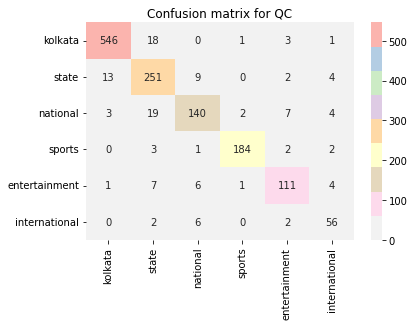

In [41]:
import matplotlib.pyplot as plt
from seaborn import heatmap
from sklearn.metrics import confusion_matrix

#plot heatmap of confusion matrix
mat = confusion_matrix(y_true, y_preds)
heatmap(mat, cmap="Pastel1_r", fmt="d", xticklabels=target_names, yticklabels=target_names, annot=True)

#add overall title to plot
plt.title('Confusion matrix for QC', fontsize = 12) # title with fontsize 20

In [59]:
misclassified = [i for i in range(len(y_preds)) if ((y_preds[i] != y_true[i]) and (y_true[i]==5) and (y_preds[i]==2))]

In [60]:
misclassified = test_dataset.select(misclassified)

In [61]:
misclassified[:]

{'labels': ['international',
  'international',
  'international',
  'international',
  'international',
  'international'],
 'text': ['সেনাবাহিনীতে মহিলাদের সংখ্যাবৃদ্ধির কথা বলছেন প্রধানমন্ত্রী নরেন্দ্র মোদী এবং তাঁর প্রতিরক্ষামন্ত্রী মনোহর পর্রীকর। আর বায়ুসেনার এক আধিকারিক অভিযোগ করছেন, মহিলা হওয়ায় তিনি ন্যায্য সম্মান পাচ্ছেন না। আমেরিকার প্রেসিডেন্ট বারাক ওবামাকে ‘গার্ড অফ অনার’ দেওয়া বায়ুসেনার উইং কম্যান্ডার পূজা ঠাকুর বৈষ্যমের অভিযোগ এনে সেনা ট্রাইব্যুনালে মামলা করেছেন।\n২০১৫ সালের ২৬ জানুয়ারি, প্রজাতন্ত্র দিবসের অনুষ্ঠানে বিশেষ অতিথি হিসাবে এসেছিলেন আমেরিকার প্রেসিডেন্ট বারাক ওবামা। সেখানে তাঁকে ‘গার্ড অফ অনার’ দিয়েছিলেন পূজা। কিন্তু এখন তাঁর অভিযোগ, তাঁকে স্থায়ী নিয়োগ (পার্মানেন্ট কমিশন) করা হচ্ছে না। বায়ুসেনা কর্তৃপক্ষ তাঁর সঙ্গে ‘বৈষম্যমূলক’ আচরণ করছেন। তাঁর অভিযোগের ভিত্তিতে বায়ুসেনার ব্যাখ্যা চেয়েছে ট্রাইব্যুনাল।\n\nপূজার আইনজীবী সুধাংশু পাণ্ডে আজ জানিয়েছেন, বায়ুসেনা কর্তৃপক্ষের যুক্তি, তাঁরা ২০১২ সালে যখন পূজাকে স্থায়ী নিয়োগ করতে চেয়েছিলেন, তখন তিনি রাজি হননি। তাই এখন আর ত

In [31]:
model = AutoModelForSequenceClassification.from_pretrained("models/bert-unigram-bengali-classifier")
model.to("cuda")

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=1)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [37]:
trainer.evaluate(tokenized_datasets["validation"])

{'eval_loss': 0.47230616211891174,
 'eval_accuracy': 0.9029057406094968,
 'eval_runtime': 3.4463,
 'eval_samples_per_second': 409.426,
 'eval_steps_per_second': 13.058,
 'epoch': 6.0}